In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
rand_state = 19

Load Data

In [3]:
data = pd.read_csv('IN_emissions_data.csv')

In [4]:
data.head()

,Year,Per Acre Emissions,N,P,Potash,IN Corn Yield per Acre,Precipitation,Average Temperature,IN No Till Corn (Thousands of acres),IN Con Till Corn (Thousands of acres),IN Corn Cover Crop (Thousands of acres),Conventional Till,efficiency
0,1990,3.306718,139.0,75.0,111.0,129,50.44,54.4,479.255,824.200,0.0,4146.545,39.011486
1,1991,3.508214,135.0,78.0,112.0,92,37.56,54.8,723.426,1061.613,0.0,3764.961,26.224166
2,1992,3.376282,143.0,66.0,107.0,147,44.22,52.6,967.598,1299.025,0.0,3703.377,43.539021
3,1993,2.860590,134.0,68.0,114.0,132,50.78,52.0,1211.769,1536.438,0.0,2651.793,46.144325
4,1994,3.331703,147.0,74.0,112.0,144,31.63,53.3,1131.817,1534.523,0.0,3293.660,43.221141


Split data into train and test sets prior to Smote and bootstrap sample growth

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
data['cover_crop_dummy'] = data['IN Corn Cover Crop (Thousands of acres)'] != 0

In [7]:
y = data.pop('cover_crop_dummy')
X = data

In [8]:
len(X)

28

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=rand_state)

Establish hold out set from test data

In [10]:
hold_out = X_test.join(y_test).drop('cover_crop_dummy', axis=1)

In [11]:
hold_out

,Year,Per Acre Emissions,N,P,Potash,IN Corn Yield per Acre,Precipitation,Average Temperature,IN No Till Corn (Thousands of acres),IN Con Till Corn (Thousands of acres),IN Corn Cover Crop (Thousands of acres),Conventional Till,efficiency
16,2006,2.758260,148.0,69.0,122.0,157,51.06,54.5,1365.257,1953.378,0.000,2061.365,56.919946
27,2017,2.802987,166.0,72.0,114.0,180,47.45,55.6,1134.432,1816.156,362.494,2249.412,64.217218
15,2005,3.096088,147.0,77.0,124.0,154,43.74,53.9,1188.362,1704.603,0.000,2877.035,49.740185
18,2008,2.802926,149.0,70.0,126.0,160,49.04,52.7,1393.276,2095.076,0.000,1971.648,57.083199
4,1994,3.331703,147.0,74.0,112.0,144,31.63,53.3,1131.817,1534.523,0.000,3293.660,43.221141
24,2014,2.753550,156.0,74.0,114.0,188,41.62,50.0,1443.850,2297.250,461.081,2028.900,68.275487


SMOTE

In [12]:
from imblearn.over_sampling import SMOTENC

In [13]:
sm = SMOTENC(categorical_features=[1], k_neighbors=3, random_state=rand_state)

In [14]:
smote_data = X_train.join(pd.DataFrame(y_train)) 

In [15]:
smote_y = smote_data.pop('cover_crop_dummy')
smote_X = smote_data

In [16]:
X_train_smote, y_train_smote = sm.fit_resample(smote_X, smote_y) 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Per Acre Emissions', ylabel='IN Corn Yield per Acre'>

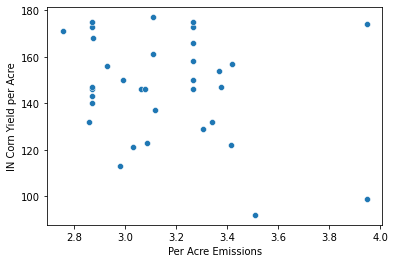

In [17]:
sns.scatterplot(X_train_smote['Per Acre Emissions'], X_train_smote['IN Corn Yield per Acre'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Per Acre Emissions', ylabel='IN Corn Yield per Acre'>

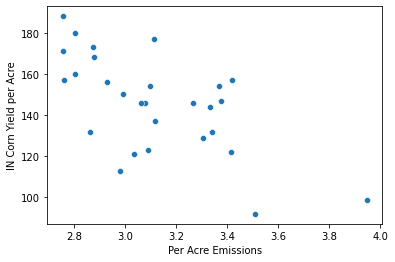

In [18]:
sns.scatterplot(data['Per Acre Emissions'], data['IN Corn Yield per Acre'])

In [19]:
smote_data = X_train_smote.join(y_train_smote)

Bootstrap - Random Over Sample

In [20]:
bootstrap_data = smote_data

In [21]:
size = int(len(X_train_smote))
post_bootstrap = bootstrap_data
seed = rand_state
while size < 300:
    random_sample = bootstrap_data.sample(n=7, replace=True, random_state=seed)
    post_bootstrap = pd.concat([post_bootstrap, random_sample])
    size = len(post_bootstrap)
    seed += rand_state

In [22]:
post_bootstrap.cover_crop_dummy.value_counts()

True     150
False    150
Name: cover_crop_dummy, dtype: int64

In [23]:
post_bootstrap.efficiency.max()

62.05427971311327

In [24]:
processed_data = post_bootstrap.drop('cover_crop_dummy', axis=1)

In [25]:
processed_data.to_csv('/Users//Documents/GitHub/Capstone 2/SMOTE300_data.csv', index=False)
hold_out.to_csv('/Users//Documents/GitHub/Capstone 2/hold_out_data300.csv', index=False)

###Standardization is done as part of the pipeline during modeling notebook.###

Boxplots

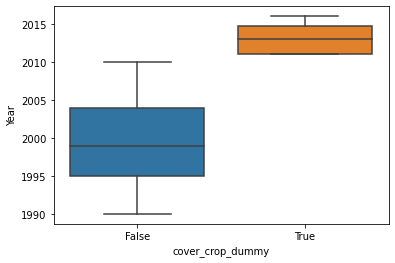

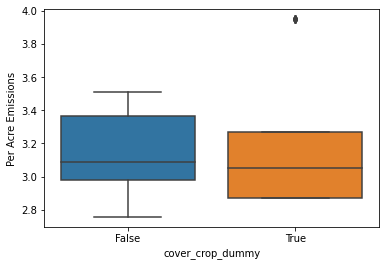

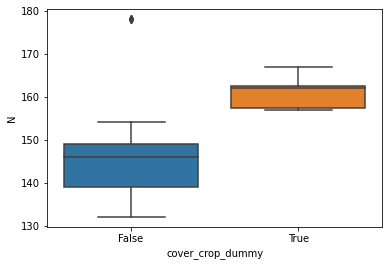

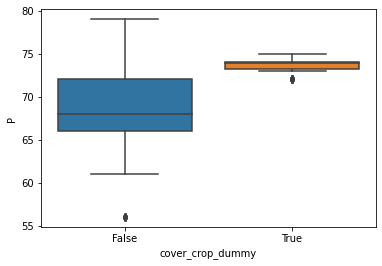

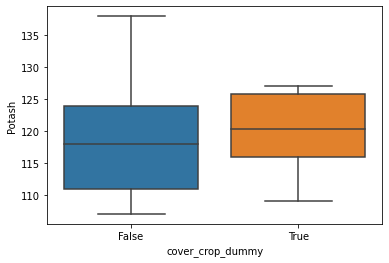

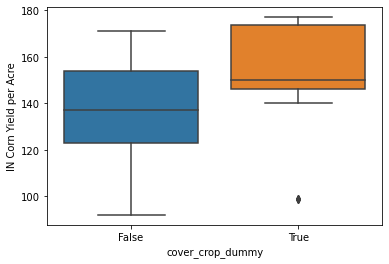

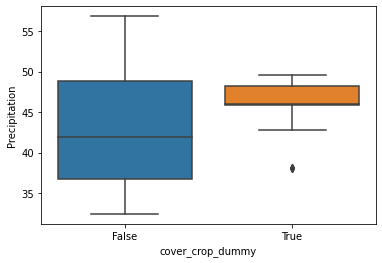

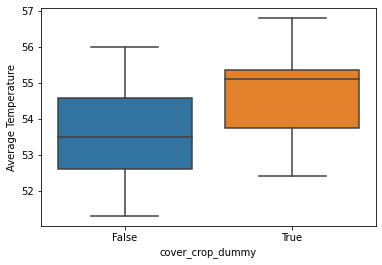

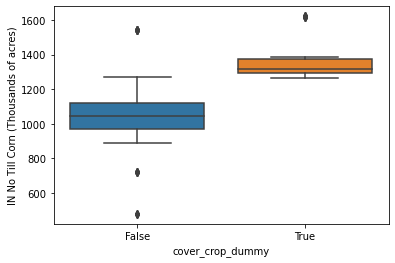

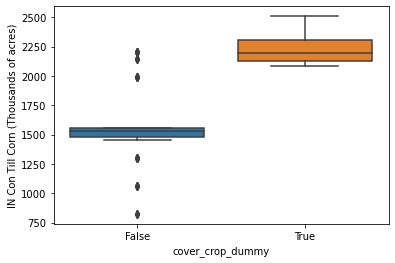

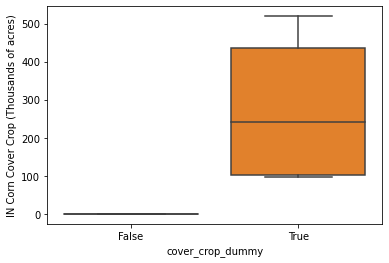

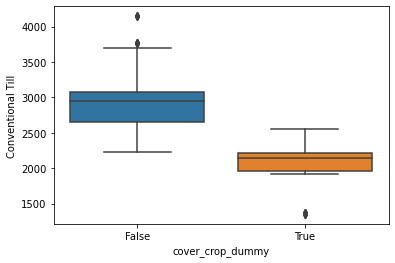

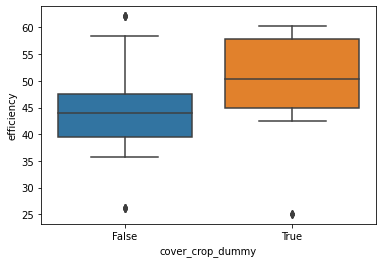

In [26]:
for col in post_bootstrap.columns:
    if col == 'cover_crop_dummy':
        continue
    fig, axs = plt.subplots(nrows=1, ncols=1)
    sns.boxplot(x=post_bootstrap['cover_crop_dummy'], y=post_bootstrap[col])
